In [1]:
import random
from matplotlib import pyplot as plt
import sys
import os
%load_ext autoreload
%autoreload 2
sys.path.append("../")

In [2]:
from game.chinese_chess import ChineseChess

## 1.初始化中国象棋环境

In [3]:
cchess = ChineseChess(1.0)

C:\ProgramData\Anaconda3\lib\site-packages\gym-0.17.1-py3.7.egg\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## 2.查看observation数组

In [4]:
observation = cchess.make_observation(0)

In [5]:
observation[0]


array([[-1., -2., -3., -4., -5., -4., -3., -2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -7.,  0.,  0.,  0.,  0.,  0., -7.,  0.],
       [-6.,  0., -6.,  0., -6.,  0., -6.,  0., -6.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 6.,  0.,  6.,  0.,  6.,  0.,  6.,  0.,  6.],
       [ 0.,  7.,  0.,  0.,  0.,  0.,  0.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  4.,  3.,  2.,  1.]])

## 3.进行随机自对弈

In [6]:
cchess = ChineseChess(1.0)
images = []
posstr = []
moves = []
maxstep = 500
steps = 0
while True:
    actions = cchess.legal_actions()
    one_action = random.choice(actions)
    reward = cchess.step(one_action)
    images.append(cchess.make_observation_image())
    posstr.append(cchess.make_observation_str())
    moves.append(cchess.action2str(one_action.index))
    if cchess.terminal():
        break
    steps += 1
    if steps > maxstep:
        break
        

In [7]:
print(reward)

1


In [8]:
print("一共走了 {} 步".format(len(cchess.observations)))

一共走了 68 步


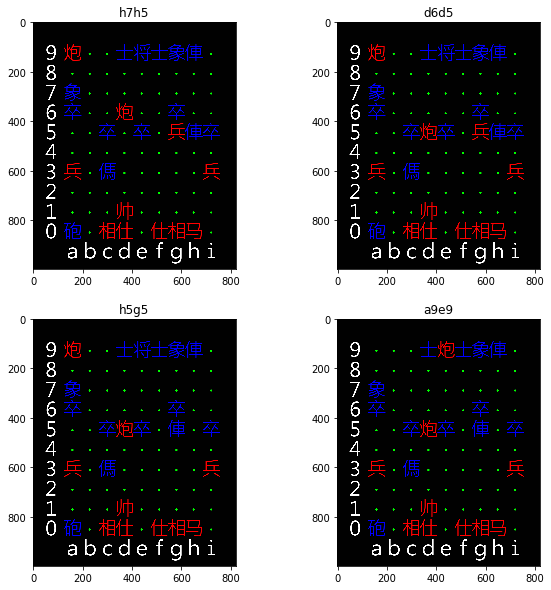

In [9]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i + 1)
    plt.imshow(images[-4 + i])
    plt.title(moves[-4 + i])

In [10]:
import numpy as np
def conditioned_hidden_state( action) -> np.array:
    action_plane = np.zeros((2,10,9))
    action_ind = action.index
    from_ind,to_ind = divmod(action_ind,90)
    def set_plane_onehot(action_plane,pos,plane_id):
        y,x = divmod(pos,9)
        y = 9 - y
        action_plane[plane_id,y,x] = 1
    set_plane_onehot(action_plane,from_ind,0)
    set_plane_onehot(action_plane,to_ind,1)

    return action_plane
conditioned_hidden_state(one_action)

array([[[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

In [11]:
observation = cchess.make_observation(-1)
observation.shape

(6, 10, 9)

In [12]:
for i in range(4):
    print(observation[3 - i])

[[ 7. -0. -0. -4. -5. -4. -3. -1. -0.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-3. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-6. -0. -0.  7. -0. -0. -6. -0. -0.]
 [-0. -0. -6. -0. -6. -0.  6. -1. -6.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [ 6. -0. -2. -0. -0. -0. -0. -0.  6.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0.  5. -0. -0. -0. -0. -0.]
 [-7. -0.  3.  4. -0.  4.  3.  2. -0.]]
[[ 7. -0. -0. -4. -5. -4. -3. -1. -0.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-3. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-6. -0. -0. -0. -0. -0. -6. -0. -0.]
 [-0. -0. -6.  7. -6. -0.  6. -1. -6.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [ 6. -0. -2. -0. -0. -0. -0. -0.  6.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0.  5. -0. -0. -0. -0. -0.]
 [-7. -0.  3.  4. -0.  4.  3.  2. -0.]]
[[ 7. -0. -0. -4. -5. -4. -3. -1. -0.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-3. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-6. -0. -0. -0. -0. -0. -6. -0. -0.]
 [-0. -0. -6.  7. -6. -0. -1. -0. -6.]
 [-0. -0. -0. -0. -0. -

In [13]:
for i in range(4):
    print(posstr[-4 + i])


 9炮．．士将士象俥．
 8．．．．．．．．．
 7象．．．．．．．．
 6卒．．炮．．卒．．
 5．．卒．卒．兵俥卒
 4．．．．．．．．．
 3兵．傌．．．．．兵
 2．．．．．．．．．
 1．．．帅．．．．．
 0砲．相仕．仕相马．
  ａｂｃｄｅｆｇｈｉ



 9炮．．士将士象俥．
 8．．．．．．．．．
 7象．．．．．．．．
 6卒．．．．．卒．．
 5．．卒炮卒．兵俥卒
 4．．．．．．．．．
 3兵．傌．．．．．兵
 2．．．．．．．．．
 1．．．帅．．．．．
 0砲．相仕．仕相马．
  ａｂｃｄｅｆｇｈｉ



 9炮．．士将士象俥．
 8．．．．．．．．．
 7象．．．．．．．．
 6卒．．．．．卒．．
 5．．卒炮卒．俥．卒
 4．．．．．．．．．
 3兵．傌．．．．．兵
 2．．．．．．．．．
 1．．．帅．．．．．
 0砲．相仕．仕相马．
  ａｂｃｄｅｆｇｈｉ



 9．．．士炮士象俥．
 8．．．．．．．．．
 7象．．．．．．．．
 6卒．．．．．卒．．
 5．．卒炮卒．俥．卒
 4．．．．．．．．．
 3兵．傌．．．．．兵
 2．．．．．．．．．
 1．．．帅．．．．．
 0砲．相仕．仕相马．
  ａｂｃｄｅｆｇｈｉ




## 4.查看局面数量和move数量

In [14]:
"局面数量",len(cchess.observations)

('局面数量', 68)

In [15]:
"move数量",len(moves)

('move数量', 67)

In [16]:
# 可以看到，局面数量比move多1，这是预期之中的